In [ ]:
pip install  scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#For handling overfitting
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
Content_data=pd.read_csv("F:/Python_WC/Content Monetization Modeler/Content_Monetization_Modeler_Analysis/youtube_ad_revenue_dataset.csv")

In [3]:
Content_data.head(10)

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,50:41.0,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
5,vid_5000,50:41.0,10002,843.0,159.0,35131.756228,12.491826,541268,Music,TV,CA,234.965996
6,vid_2041,50:41.0,9989,1944.0,160.0,35380.070908,6.520903,193736,Music,Mobile,IN,255.009412
7,vid_3623,50:41.0,10051,784.0,458.0,19263.212580,24.586121,823662,Entertainment,Tablet,US,164.533455
8,vid_750,50:41.0,9934,292.0,88.0,NaN,5.946666,58437,Entertainment,Desktop,UK,336.409856
9,vid_4434,50:41.0,10051,NaN,61.0,40011.579945,24.454723,103872,Tech,Tablet,DE,246.711883


In [4]:
Content_data.shape

(122400, 12)

In [5]:
Content_data.describe().T

,count,mean,std,min,25%,50%,75%,max
views,122400.0,9999.856283,99.881260,9521.000000,9933.000000,10000.000000,10067.000000,10468.000000
likes,116283.0,1099.633618,519.424089,195.000000,650.000000,1103.000000,1547.000000,2061.000000
comments,116288.0,274.396636,129.741739,48.000000,162.000000,274.000000,387.000000,515.000000
watch_time_minutes,116295.0,37543.827721,12987.724246,14659.105562,26366.320569,37531.990337,48777.782090,61557.670089
video_length_minutes,122400.0,16.014165,8.083790,2.000142,9.004695,16.005906,23.021260,29.999799
subscribers,122400.0,502191.719902,288397.470103,1005.000000,252507.500000,503465.500000,752192.000000,999997.000000
ad_revenue_usd,122400.0,252.727210,61.957052,126.590603,199.902018,252.749699,305.597518,382.768254


In [6]:
Content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


## Data Preprocessing

In [7]:
Content_data.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [8]:
Content_data.isnull().mean() * 100

video_id                0.000000
date                    0.000000
views                   0.000000
likes                   4.997549
comments                4.993464
watch_time_minutes      4.987745
video_length_minutes    0.000000
subscribers             0.000000
category                0.000000
device                  0.000000
country                 0.000000
ad_revenue_usd          0.000000
dtype: float64

In [9]:
missing_cols = ['likes', 'comments', 'watch_time_minutes']
missing_df = Content_data[missing_cols].copy()


In [10]:
missing_df

,likes,comments,watch_time_minutes
0,1221.0,320.0,26497.214184
1,642.0,346.0,15209.747445
2,1979.0,187.0,57332.658498
3,1191.0,242.0,31334.517771
4,1858.0,477.0,15665.666434
...,...,...,...
122395,1673.0,147.0,42075.704885
122396,1709.0,63.0,57563.703040
122397,700.0,NaN,27549.714660
122398,1616.0,106.0,56967.384382


In [11]:
#standardize your numeric data before imputation.
scaler = StandardScaler()
missed_scaled = scaler.fit_transform(missing_df)
#Apply the KNN Imputer
imputer = KNNImputer(n_neighbors=5)
missed_imputed = imputer.fit_transform(missed_scaled)

In [12]:
#Reverse the Scaling
missed_imputed_unscaled = scaler.inverse_transform(missed_imputed)
Content_data[missing_cols] = missed_imputed_unscaled

In [13]:
#Make sure all missing values are filled
Content_data.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

In [14]:
Content_data.duplicated().sum()

np.int64(2400)

In [17]:
Content_data.duplicated().mean() * 100

np.float64(0.0)

In [18]:
Content_data.drop_duplicates(inplace=True)

In [19]:
Content_data.duplicated().sum()

np.int64(0)

In [20]:
Content_data['country'].value_counts()

country
CA    20198
DE    20160
IN    20156
AU    19911
UK    19893
US    19682
Name: count, dtype: int64

In [80]:
# List of categorical columns
categorical_cols = ['category', 'device', 'country']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    Content_data[col] = le.fit_transform(Content_data[col])
   


In [22]:
Content_data.head(20)

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.214184,2.862137,228086,1,2,3,203.178237
1,vid_3459,50:41.0,10017,642.0,346.0,15209.747445,23.738069,736015,2,3,1,140.880508
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.658498,26.200634,240534,0,2,1,360.134008
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.517771,11.770340,434482,1,1,4,224.638261
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.666434,6.635854,42030,0,1,1,165.514388
5,vid_5000,50:41.0,10002,843.0,159.0,35131.756228,12.491826,541268,4,2,1,234.965996
6,vid_2041,50:41.0,9989,1944.0,160.0,35380.070908,6.520903,193736,4,1,3,255.009412
7,vid_3623,50:41.0,10051,784.0,458.0,19263.212580,24.586121,823662,1,3,5,164.533455
8,vid_750,50:41.0,9934,292.0,88.0,22013.491880,5.946666,58437,1,0,4,336.409856
9,vid_4434,50:41.0,10051,1112.4,61.0,40011.579945,24.454723,103872,5,3,2,246.711883


In [23]:
Content_data.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                  int64
device                    int64
country                   int64
ad_revenue_usd          float64
dtype: object

In [24]:
#Feature Engineering
#new column
Content_data['engagement_rate']=(Content_data['likes']+Content_data['comments'])/Content_data['views']

In [25]:
Content_data.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate
0,vid_3092,50:41.0,9936,1221.0,320.0,26497.214184,2.862137,228086,1,2,3,203.178237,0.155093
1,vid_3459,50:41.0,10017,642.0,346.0,15209.747445,23.738069,736015,2,3,1,140.880508,0.098632
2,vid_4784,50:41.0,10097,1979.0,187.0,57332.658498,26.200634,240534,0,2,1,360.134008,0.214519
3,vid_4078,50:41.0,10034,1191.0,242.0,31334.517771,11.770340,434482,1,1,4,224.638261,0.142814
4,vid_3522,50:41.0,9889,1858.0,477.0,15665.666434,6.635854,42030,0,1,1,165.514388,0.236121


In [ ]:
#calculate average view duration
Content_data['avg_view_duration'] = Content_data['watch_time_minutes'] / Content_data['views']

# Calculate average percent watched
Content_data['avg_percent_watched'] = (Content_data['avg_view_duration'] / Content_data['video_length_minutes']) * 100

#  round to 2 decimals
Content_data['avg_percent_watched'] = Content_data['avg_percent_watched'].round(2)

In [29]:
#drop the date columns
drop_cols = ['video_id','date']
Content_data.drop(drop_cols , axis=1, inplace=True)

In [30]:
Content_data.columns

Index(['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd', 'engagement_rate', 'avg_view_duration',
       'avg_percent_watched'],
      dtype='object')

In [31]:
numeric_features = ['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 
       'ad_revenue_usd', 'engagement_rate', 'avg_view_duration',
       'avg_percent_watched']

In [32]:
# Final processed dataset
Content_data.head()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,avg_view_duration,avg_percent_watched
0,9936,1221.0,320.0,26497.214184,2.862137,228086,1,2,3,203.178237,0.155093,2.666789,93.17
1,10017,642.0,346.0,15209.747445,23.738069,736015,2,3,1,140.880508,0.098632,1.518393,6.40
2,10097,1979.0,187.0,57332.658498,26.200634,240534,0,2,1,360.134008,0.214519,5.678187,21.67
3,10034,1191.0,242.0,31334.517771,11.770340,434482,1,1,4,224.638261,0.142814,3.122834,26.53
4,9889,1858.0,477.0,15665.666434,6.635854,42030,0,1,1,165.514388,0.236121,1.584151,23.87


In [33]:
Content_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   views                 120000 non-null  int64  
 1   likes                 120000 non-null  float64
 2   comments              120000 non-null  float64
 3   watch_time_minutes    120000 non-null  float64
 4   video_length_minutes  120000 non-null  float64
 5   subscribers           120000 non-null  int64  
 6   category              120000 non-null  int64  
 7   device                120000 non-null  int64  
 8   country               120000 non-null  int64  
 9   ad_revenue_usd        120000 non-null  float64
 10  engagement_rate       120000 non-null  float64
 11  avg_view_duration     120000 non-null  float64
 12  avg_percent_watched   120000 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 12.8 MB


## EDA 

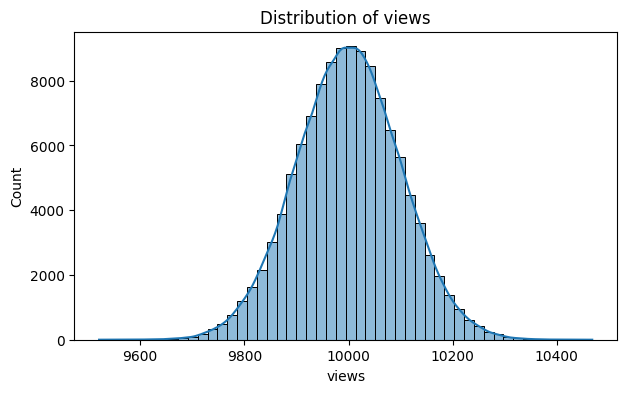

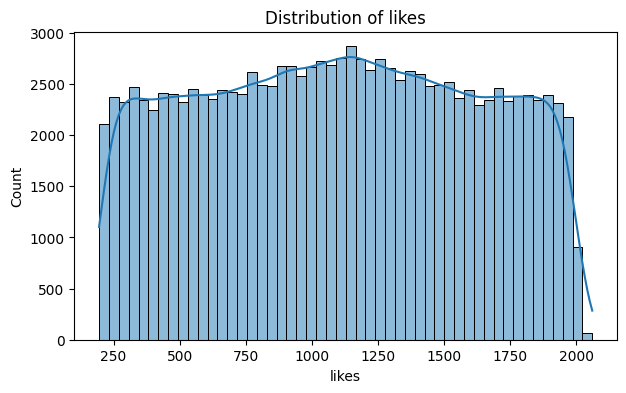

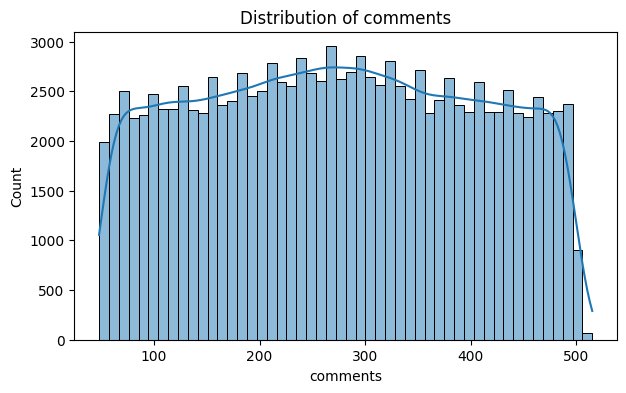

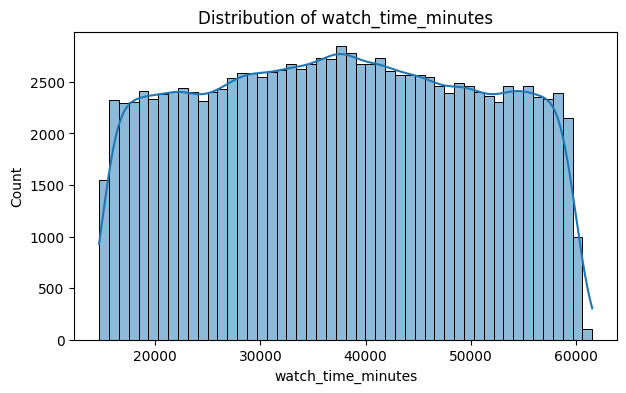

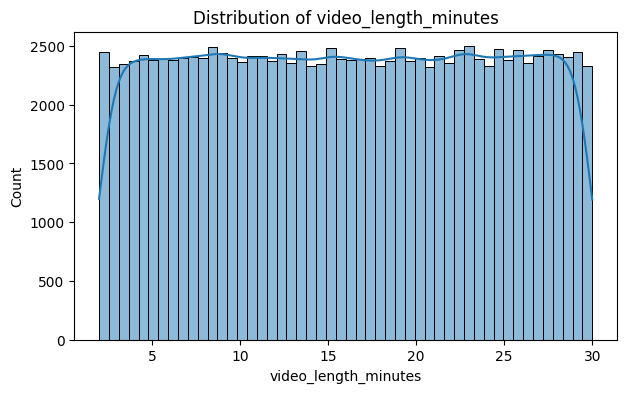

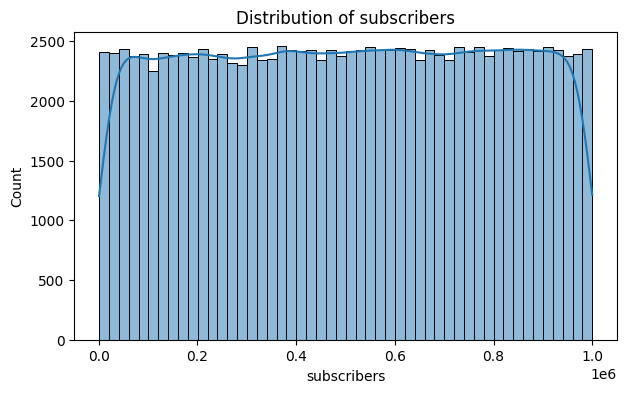

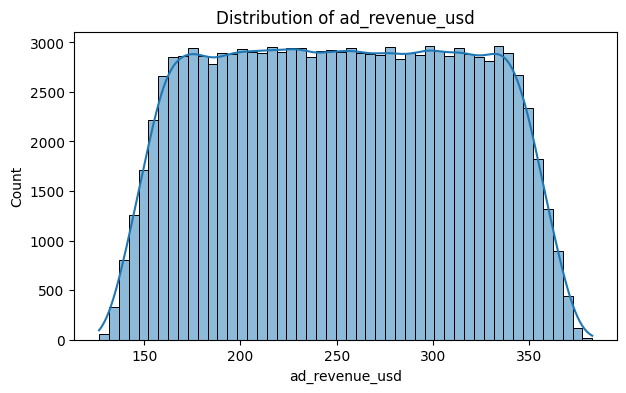

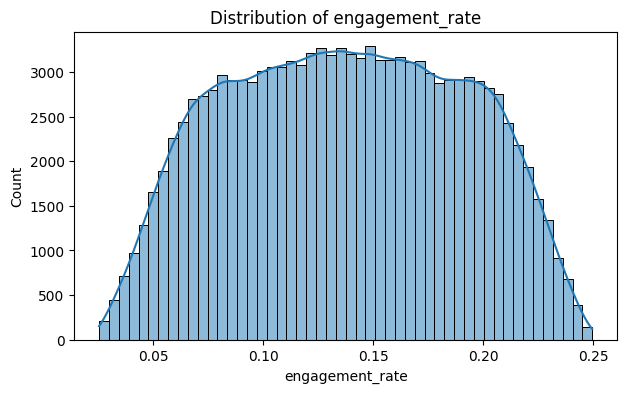

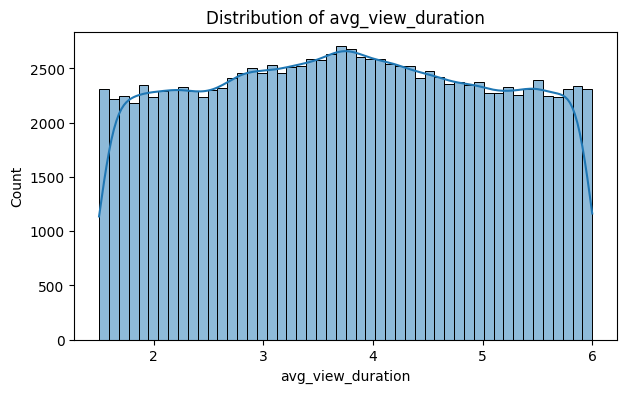

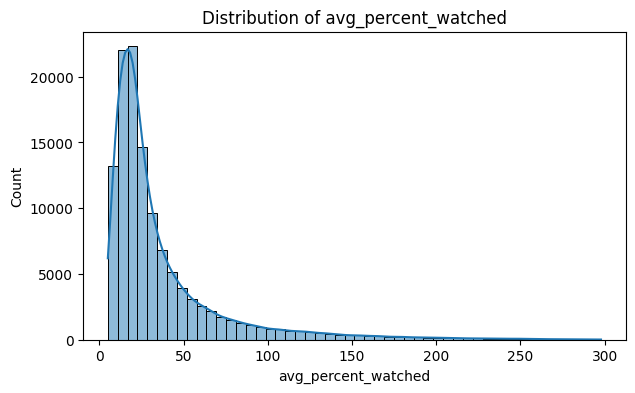

In [34]:
for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.histplot(Content_data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

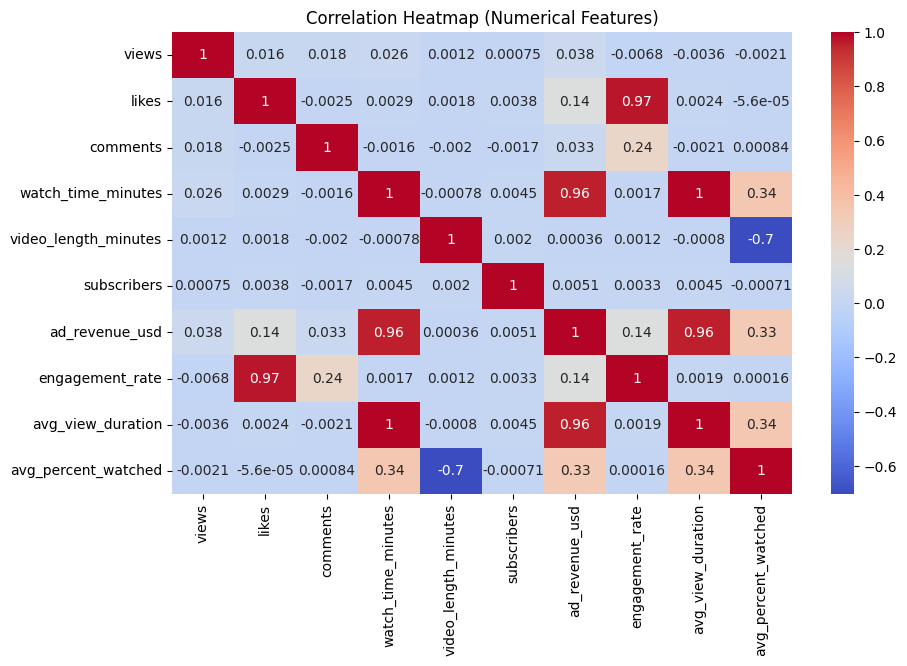

In [35]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Content_data[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [36]:
#Detect outliers programmatically (IQR method)
def find_outliers(df):
    outliers_dict = {}
    outliers_count={}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_dict[col] = outliers.values
        outliers_count[col] = len(outliers)
    
    
    return outliers_dict,outliers_count

outliers,outliersCount= find_outliers(Content_data)
#print("Outliers for each column:\n", outliers)
print("Outliers count for each column:\n", outliersCount)

Outliers count for each column:
 {'views': 865, 'likes': 0, 'comments': 0, 'watch_time_minutes': 0, 'video_length_minutes': 0, 'subscribers': 0, 'category': 0, 'device': 0, 'country': 0, 'ad_revenue_usd': 0, 'engagement_rate': 0, 'avg_view_duration': 0, 'avg_percent_watched': 11248}


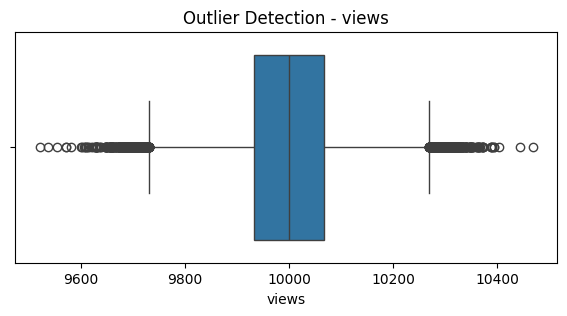

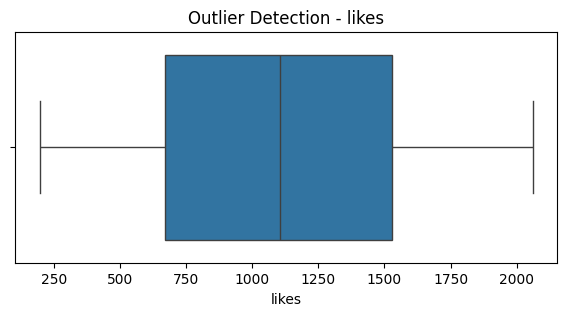

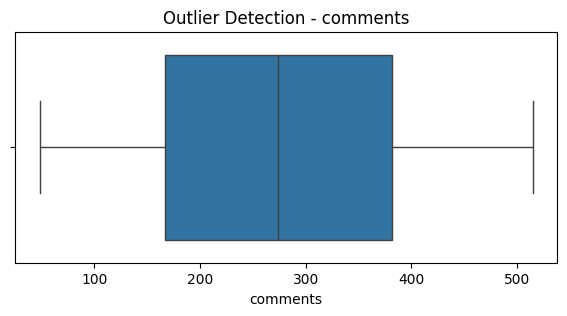

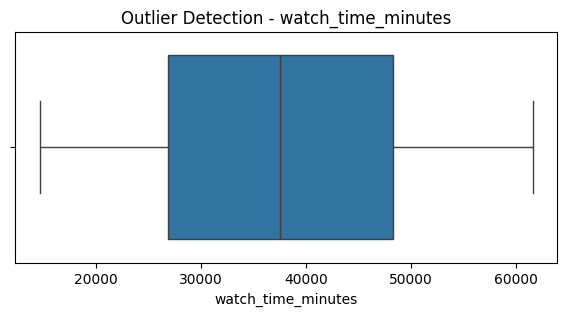

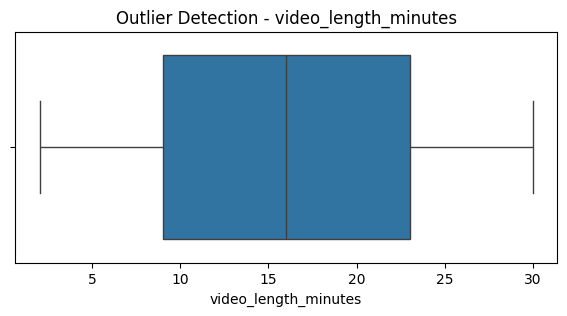

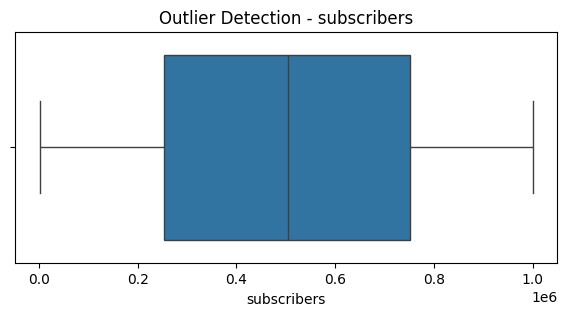

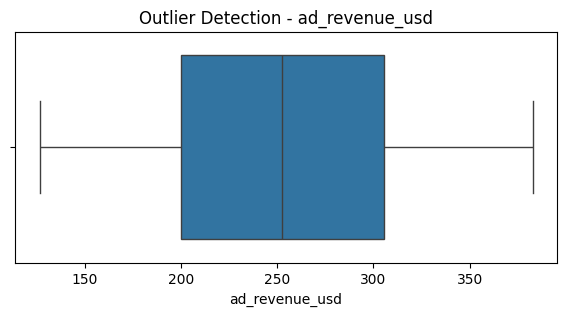

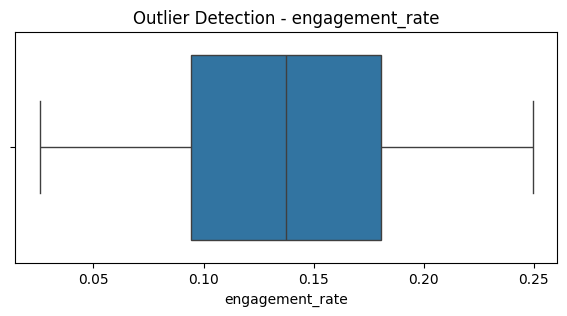

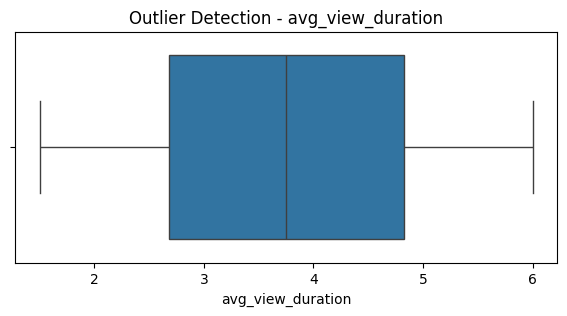

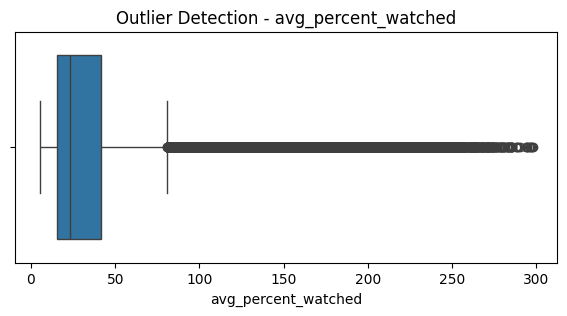

In [37]:
# Outlier detection
for col in numeric_features:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=Content_data[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

✅ Outliers after capping:
 ({'views': array([], dtype=int64), 'likes': array([], dtype=float64), 'comments': array([], dtype=float64), 'watch_time_minutes': array([], dtype=float64), 'video_length_minutes': array([], dtype=float64), 'subscribers': array([], dtype=int64), 'category': array([], dtype=int64), 'device': array([], dtype=int64), 'country': array([], dtype=int64), 'ad_revenue_usd': array([], dtype=float64), 'engagement_rate': array([], dtype=float64), 'avg_view_duration': array([], dtype=float64), 'avg_percent_watched': array([], dtype=float64)}, {'views': 0, 'likes': 0, 'comments': 0, 'watch_time_minutes': 0, 'video_length_minutes': 0, 'subscribers': 0, 'category': 0, 'device': 0, 'country': 0, 'ad_revenue_usd': 0, 'engagement_rate': 0, 'avg_view_duration': 0, 'avg_percent_watched': 0})


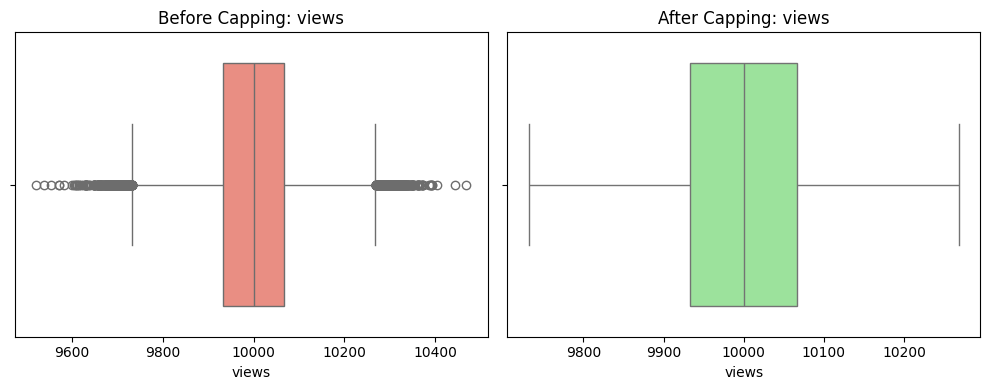

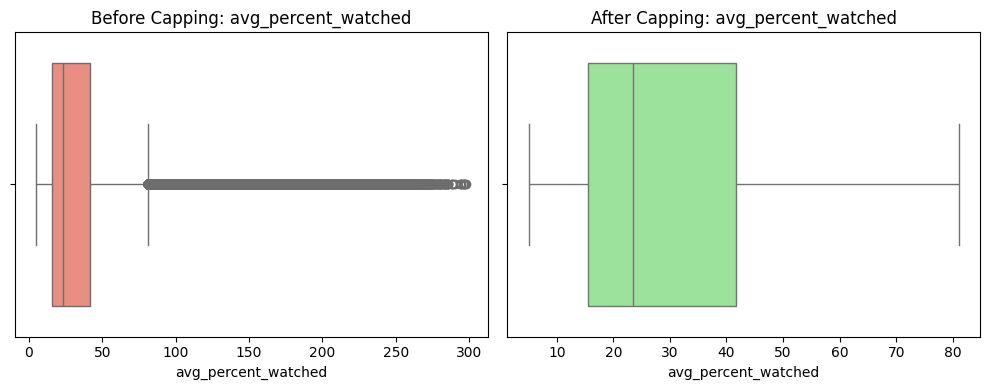

Assigned only capped columns back to the original DataFrame


In [38]:
# Handling Outliers 

def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside bounds
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped


Content_data_clean =Content_data.copy()
cols = ['views', 'avg_percent_watched']
Content_data_clean = cap_outliers_iqr(Content_data, cols)

#  Recalculate outliers (AFTER capping)
outliers_count_after = find_outliers(Content_data_clean)

print("✅ Outliers after capping:\n", outliers_count_after)


# Verify by Boxplot
for col in cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=Content_data[col], color='salmon')
    plt.title(f"Before Capping: {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=Content_data_clean[col], color='lightgreen')
    plt.title(f"After Capping: {col}")
    plt.tight_layout()
    plt.show()


    #Assign only capped columns back to the original DataFrame
Content_data[cols] = Content_data_clean[cols]

print("Assigned only capped columns back to the original DataFrame")

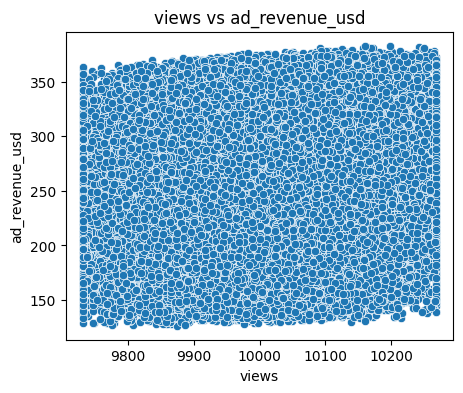

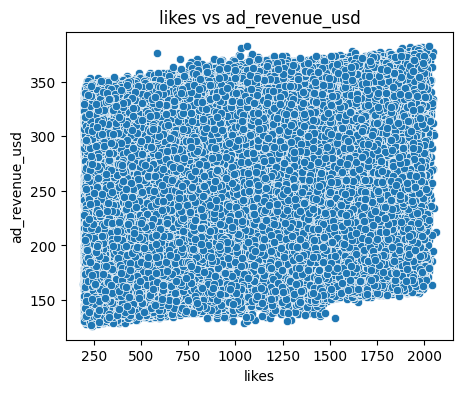

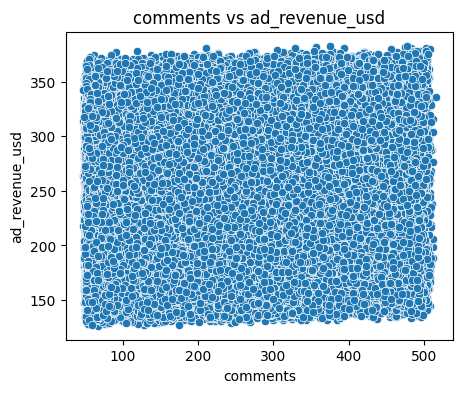

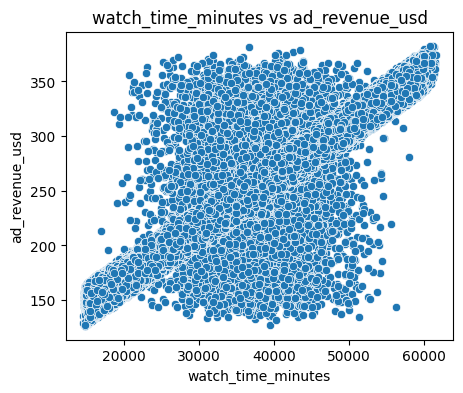

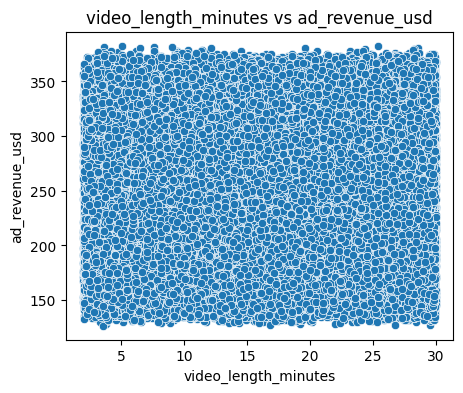

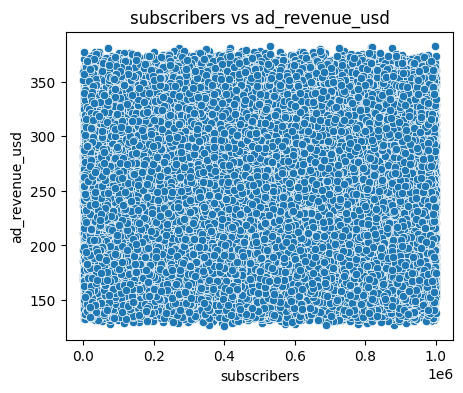

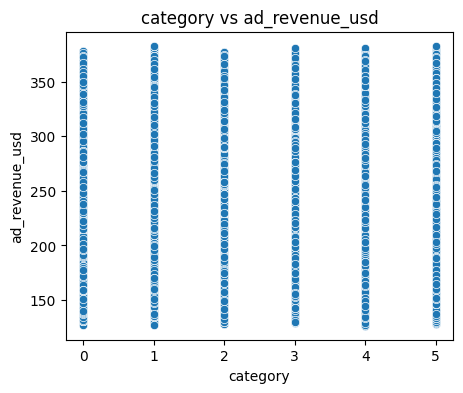

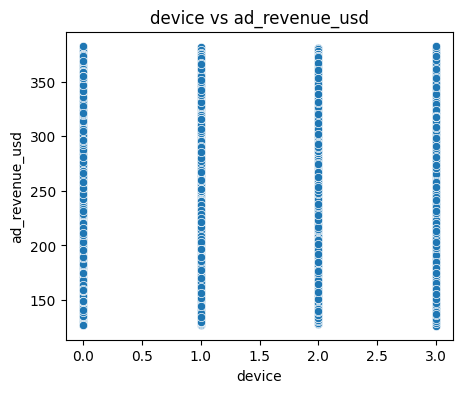

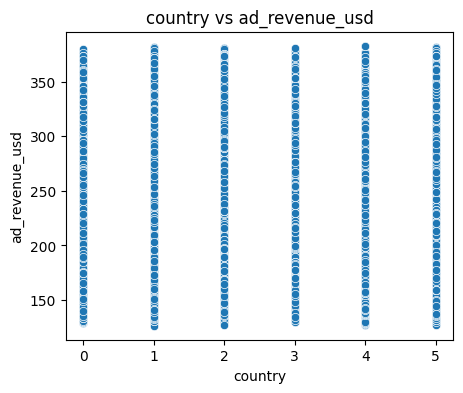

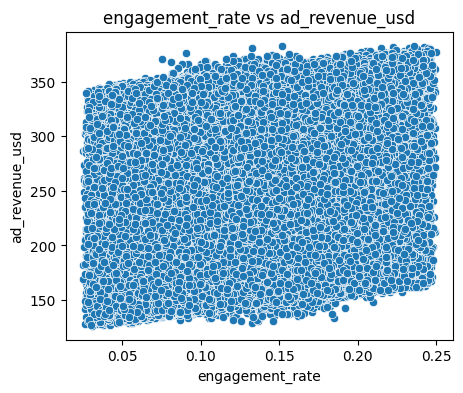

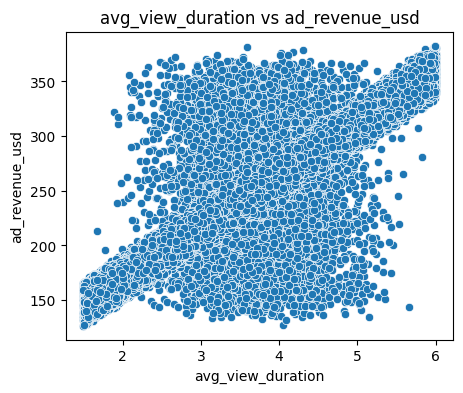

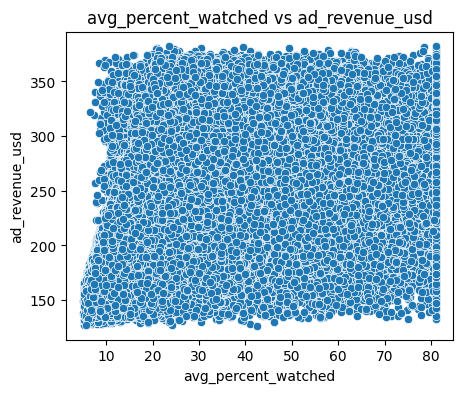

In [40]:
X = Content_data.drop(columns=['ad_revenue_usd'])
y = Content_data['ad_revenue_usd']

target = 'ad_revenue_usd'

for col in X.columns:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=Content_data[col], y=Content_data[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


In [41]:
corr = Content_data[numeric_features].corr()['ad_revenue_usd'].sort_values(ascending=False)
print(corr)

ad_revenue_usd          1.000000
watch_time_minutes      0.958332
avg_view_duration       0.957476
avg_percent_watched     0.372931
engagement_rate         0.144963
likes                   0.141982
views                   0.037899
comments                0.033469
subscribers             0.005065
video_length_minutes    0.000364
Name: ad_revenue_usd, dtype: float64


Interpretation:

Values near +1 or -1 → strong linear relationship

Values near 0 → weak linear relationship (try nonlinear models)

In [42]:
Content_data.to_csv("F:/Python_WC/Content Monetization Modeler/Content_Monetization_Modeler_Analysis/youtube_ad_revenue_Cleaned_dataset.csv",index= False)

## Model Building

In [43]:
# ---------------------------
# 1. Features & Target
# ---------------------------
X = Content_data.drop(columns=['ad_revenue_usd', 'video_id'], errors='ignore')  
y = Content_data['ad_revenue_usd']

# Split train-test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,engagement_rate,avg_view_duration,avg_percent_watched
53983,10020,389.0,128.0,40571.635752,18.862455,581026,1,2,2,0.051597,4.049065,21.470
41987,9901,1455.6,339.0,25615.218266,27.610655,456530,0,1,2,0.181254,2.587134,9.370
75735,9936,1318.0,64.0,41525.278053,19.175329,232511,5,3,0,0.139090,4.179275,21.800
108324,10107,467.0,147.0,49980.232653,29.262805,772846,4,3,5,0.060750,4.945111,16.900
63693,10036,1555.0,92.0,44451.373183,11.130028,802736,5,2,1,0.164109,4.429192,39.790
...,...,...,...,...,...,...,...,...,...,...,...,...
112289,10066,387.0,370.0,20335.822782,27.685000,548367,1,3,4,0.075204,2.020249,7.300
122278,10179,302.0,246.0,48422.199515,3.898889,564934,5,1,2,0.053836,4.757068,81.015
105459,9945,1044.0,288.0,40133.815727,28.729421,925826,3,2,0,0.133937,4.035577,14.050
860,9952,415.0,284.0,33080.698168,13.189869,939121,0,2,4,0.070237,3.324025,25.200


In [45]:
X_test

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,engagement_rate,avg_view_duration,avg_percent_watched
72618,9983,880.0,275.0,59600.095182,22.326779,222682,0,3,0,0.115697,5.970159,26.740
67950,10121,1240.0,440.0,55228.057757,7.610556,611282,5,0,4,0.165992,5.456779,71.700
54521,9922,449.0,388.0,29377.983131,7.647571,174915,3,3,1,0.084358,2.960893,38.720
7180,9937,1926.0,438.0,17908.252199,9.291331,407834,2,3,1,0.237899,1.802179,19.400
29760,10073,456.0,458.0,42983.938167,19.495574,519734,4,1,1,0.090738,4.267243,21.890
...,...,...,...,...,...,...,...,...,...,...,...,...
17331,9862,1728.0,479.0,49496.572398,3.650046,869319,5,2,0,0.223788,5.018918,81.015
90593,10048,1450.0,121.0,30146.179173,18.343632,316202,5,2,2,0.156350,3.000217,16.360
47597,10115,1967.0,271.0,17130.571305,5.953146,927336,1,1,1,0.221256,1.693581,28.450
85083,9987,1744.0,443.0,36553.797637,4.194951,607156,0,3,0,0.218985,3.660138,81.015


In [46]:
# Scaling of the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train

array([[ 0.20388244, -1.39819944, -1.15259959, ..., -1.63885151,
         0.23178402, -0.46430246],
       [-0.99548595,  0.69647462,  0.50580901, ...,  0.832834  ,
        -0.91684681, -1.00478187],
       [-0.64273054,  0.42624478, -1.655624  , ...,  0.02904976,
         0.33408906, -0.44956211],
       ...,
       [-0.552022  , -0.11185825,  0.10496143, ..., -0.06919279,
         0.22118642, -0.79573694],
       [-0.48147092, -1.34713857,  0.07352241, ..., -1.28350764,
        -0.33787601, -0.29769186],
       [ 0.072859  ,  1.39836521, -0.63385567, ...,  1.20085217,
         0.28712775, -0.7104216 ]], shape=(96000, 12))

In [48]:
X_test

array([[-0.16903042, -0.43393452,  0.0027846 , ..., -0.41690444,
         1.74117609, -0.22890357],
       [ 1.22183376,  0.27306216,  1.29964441, ...,  0.54187439,
         1.33781633,  1.77935713],
       [-0.7838327 , -1.28036666,  0.89093708, ..., -1.01431935,
        -0.62318663,  0.30621572],
       ...,
       [ 1.16136141,  1.70080268, -0.02865443, ...,  1.5953827 ,
        -1.61890669, -0.15252177],
       [-0.12871551,  1.26285752,  1.32322368, ...,  1.5520925 ,
        -0.0737941 ,  2.19543694],
       [ 0.08293773,  0.22200129, -1.08972154, ..., -0.05097917,
         0.54832722, -0.72471527]], shape=(24000, 12))

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "KNN Regressor" : KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest" : RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results
    results.append([name, r2, mae, mse, rmse])

    # Collect results into a DataFrame
results_df = pd.DataFrame(results,columns=["Model", "R² Score", "MAE","MSE","RMSE"])
   
 


In [52]:
results_df

,Model,R² Score,MAE,MSE,RMSE
0,Linear Regression,0.943260,3.707400,217.399210,14.744464
1,Ridge Regression,0.943260,3.707121,217.398967,14.744455
2,Lasso Regression,0.943260,3.782247,217.399429,14.744471
3,KNN Regressor,0.912612,10.825227,334.826595,18.298268
4,Decision Tree,0.858698,7.899273,541.396297,23.267924
5,Random Forest,0.939697,5.269809,231.050474,15.200345
6,Gradient Boosting,0.943152,4.416204,217.809955,14.758386


In [54]:
# Sort by R² descending
results_df = results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)
results_df

,Model,R² Score,MAE,MSE,RMSE
0,Ridge Regression,0.943260,3.707121,217.398967,14.744455
1,Linear Regression,0.943260,3.707400,217.399210,14.744464
2,Lasso Regression,0.943260,3.782247,217.399429,14.744471
3,Gradient Boosting,0.943152,4.416204,217.809955,14.758386
4,Random Forest,0.939697,5.269809,231.050474,15.200345
5,KNN Regressor,0.912612,10.825227,334.826595,18.298268
6,Decision Tree,0.858698,7.899273,541.396297,23.267924


In [66]:
def get_best_model(results_df):
    """
    Selects the best regression model based on R², RMSE, and MAE.
    Returns the best model name and its performance metrics.
    """

    # Rank each model per metric
    results_df["Rank_R2"] = results_df["R² Score"].rank(ascending=False)  # higher is better
    results_df["Rank_RMSE"] = results_df["RMSE"].rank(ascending=True)     # lower is better
    results_df["Rank_MAE"] = results_df["MAE"].rank(ascending=True)       # lower is better

    # Compute average rank
    results_df["Avg_Rank"] = results_df[["Rank_R2", "Rank_RMSE", "Rank_MAE"]].mean(axis=1)

    # Get best model (lowest average rank)
    best_row = results_df.loc[results_df["Avg_Rank"].idxmin()]
    best_model_name = best_row["Model"]

    print("🏆 Best Overall Model:", best_model_name)
    print(best_row[["R² Score", "MAE", "RMSE", "Avg_Rank"]])
    
    return best_model_name, best_row

   


best_model_name, best_row = get_best_model(results_df)

# Retrieve the trained model
best_model = models[best_model_name]




🏆 Best Overall Model: Ridge Regression
R² Score      0.94326
MAE          3.707121
RMSE        14.744455
Avg_Rank          1.0
Name: 0, dtype: object


In [ ]:
import joblib

# Save best model and scaler
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Save feature names (important for Streamlit input alignment)
# Save feature names safely
feature_names = Content_data.drop("ad_revenue_usd", axis=1).columns.tolist()
joblib.dump(feature_names, "X_train_columns.pkl")




print("✅ Model, scaler and feature names saved successfully!")

✅ Model, scaler, feature names and Label encoders saved successfully!


In [81]:
categorical_cols_model = ['category', 'device', 'country']
categories = {
    'category': ["Education", "Entertainment", "Gaming", "Lifestyle", "Music", "Tech"],
    'device': ["Desktop", "Mobile", "TV", "Tablet"],
    'country': ["AU", "CA", "DE", "IN", "UK", "US"]
}

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(categories[col])  # fit on all allowed values
    label_encoders[col] = le

joblib.dump(label_encoders, "encoder.pkl")
print("✅ Label encoders saved to encoder.pkl")

✅ Label encoders saved to encoder.pkl


In [72]:
feature_names

['views',
 'likes',
 'comments',
 'watch_time_minutes',
 'video_length_minutes',
 'subscribers',
 'category',
 'device',
 'country',
 'engagement_rate',
 'avg_view_duration',
 'avg_percent_watched']